<a href="https://colab.research.google.com/github/danifeerrer/ParkinsonPredictor/blob/main/Parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descargando el Dataset

---



In [3]:
from pathlib import Path

my_file = Path("parkinsson.csv")
if my_file.is_file()==False:
  !wget 'https://raw.githubusercontent.com/danifeerrer/ParkinsonPredictor/main/parkinsson.csv'

# 2. Estudiamos los datos del dataset

Leemos el contenido del dataset localizado en /content/Parkinsson disease.csv

In [4]:
import pandas as pd

park = pd.read_csv('parkinsson.csv')
park.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


park.shape devuelve un tuple que contiene como primer valor el numero de filas(muestras que se han tomado, en este caso personas) y como segundo valor el numero de columnas del dataset

In [ ]:
park.shape

(195, 24)

La mayoria de algoritmos no funcionan con datos vacios, veamos si existen algunos datos que faltan en el dataset

In [5]:
park.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
park.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Colocamos los datos que nos van a ayudar a predecir si una persona padece parkinson o no en el dataframe X, y colocamos en el dataframe y la variable a predecir, en este caso status

In [8]:
X = park
y = park['status']
X = X.drop(columns=["status", 'name'])


# 3. Visualizing the Data

Veamos si tenemos que aplicar una tecnica de sobremuestreo, esto se utiliza cuando te encuentras con un equilibrio significativo en la distribucion de las clases. En este caso, vemos que el status 0, es decir, el de los que dan negativo en parkinson, es minoritario respecto al status 1, es decir los que dan positivo

<Axes: xlabel='status', ylabel='count'>

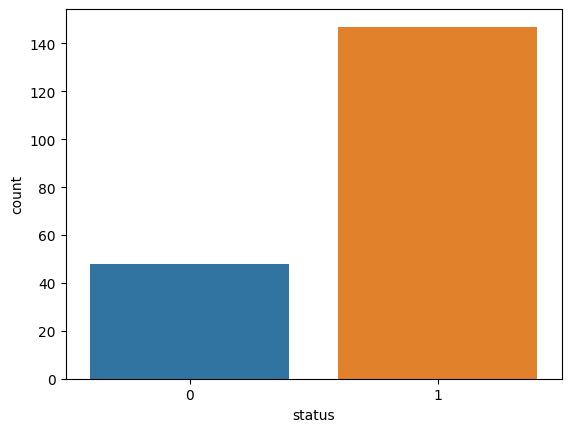

In [9]:
import seaborn as sns

sns.countplot(x="status", data=park)


In [10]:
park.status.value_counts()

1    147
0     48
Name: status, dtype: int64

[Text(0.5, 1.0, 'SMOTE Count')]

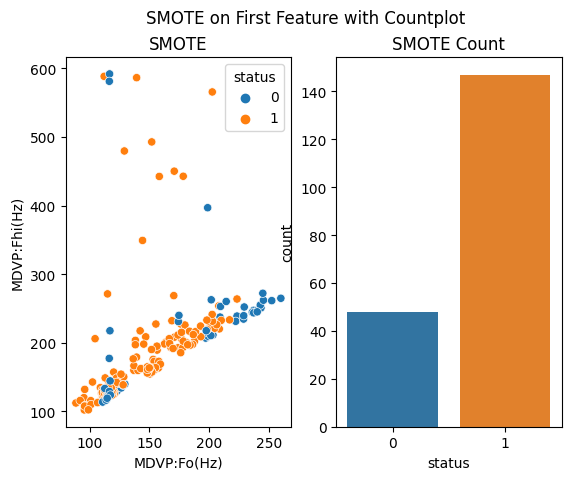

In [11]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('SMOTE on First Feature with Countplot')
sns.scatterplot(ax=ax1,data=park,x='MDVP:Fo(Hz)',y='MDVP:Fhi(Hz)',hue='status').set(title='SMOTE')
sns.countplot(ax=ax2,x="status", data=park).set(title='SMOTE Count')

Para igualar los datos de ambas clases, podemos realizar una tecnica de sobremuestreo, en este caso utilizaremos SMOTE.
Smote genera muestras sinteticas de la clase minoritaria mediante la creacion de instancias sinteticas entre ejemplos existentes de la misma clase.

In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(sampling_strategy='minority', random_state=1)
X_smote, y_smote= sm.fit_resample(X, y)
print(Counter(y_smote))


Counter({1: 147, 0: 147})


In [14]:
park_smote = X_smote.copy()
park_smote['status'] = y_smote


[Text(0.5, 1.0, 'SMOTE Count')]

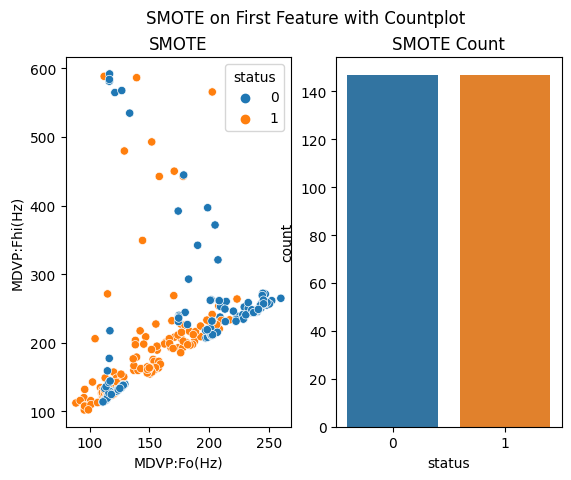

In [15]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('SMOTE on First Feature with Countplot')
sns.scatterplot(ax=ax1,data=park_smote,x='MDVP:Fo(Hz)',y='MDVP:Fhi(Hz)',hue='status').set(title='SMOTE')
sns.countplot(ax=ax2,x="status", data=park_smote).set(title='SMOTE Count')

Utilizaremos el metodo scale de la clase preprocessing para realizar un escalada de los datos en el conjunto X_smote. El metodo scale() estandariza las caracteristicas de los datos restando la media y dividiendo por la desviacion estandar.

El motivo por el que se utiliza este metodo scale() en los datos es para evitar el sesgo hacia caracteristicas dominantes.  Si las características tienen diferentes escalas, aquellas con magnitudes más grandes pueden dominar la contribución al modelo en comparación con las características de magnitudes más pequeñas.

In [16]:
from sklearn import preprocessing

cols=X_smote.columns
scale_smote=pd.DataFrame(preprocessing.scale(X_smote),columns=cols)
print(scale_smote)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0      -0.989169     -0.560018     -1.010033        0.547246   
1      -0.937633     -0.650975     -0.268792        0.978389   
2      -1.060010     -0.835361     -0.312020        1.170529   
3      -1.060139     -0.764294     -0.315628        1.046341   
4      -1.074307     -0.723188     -0.329204        1.718831   
..           ...           ...           ...             ...   
289     1.699274      0.486899      1.662317       -0.789487   
290    -0.878099     -0.809482     -0.190188       -0.278669   
291    -1.053284     -0.696998     -0.531944       -0.462866   
292     0.688968      0.089205     -0.682876        0.503901   
293     1.606370      0.401729      1.992363       -0.630065   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0            1.061759  0.313963  1.056174    0.312586      1.092665   
1            1.382382  0.683447  1.648228    0.682061      2.149072   
2            1.703

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(scale_smote, y_smote, test_size=0.2,
                                                    random_state=6)

print("Training set has {} samples. ".format(X_train.shape[0]))
print("Testing set has {} samples. ".format(X_test.shape[0]))


randomForest = RandomForestClassifier(random_state=42)

randomForest = randomForest.fit(X_train, y_train)

predictions_test = randomForest.predict(X_test)



Training set has 235 samples. 
Testing set has 59 samples. 
[1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0]


In [20]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions_test)
print("Precisión: ", (accuracy * 100).round(2),  "%")

Precisión:  98.31 %


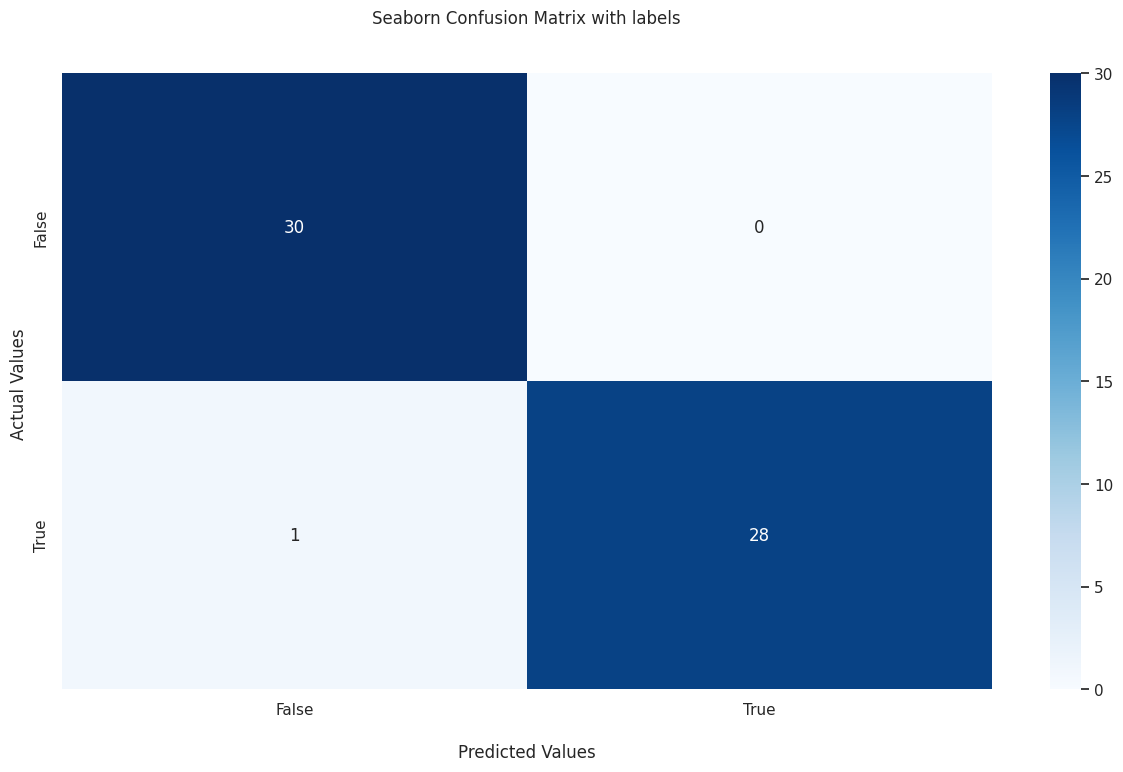

In [21]:
from sklearn.metrics import confusion_matrix


cm=confusion_matrix(y_test,predictions_test)
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()